In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [3]:
X=df.drop(columns=['Price'])
y=df['Price'].values

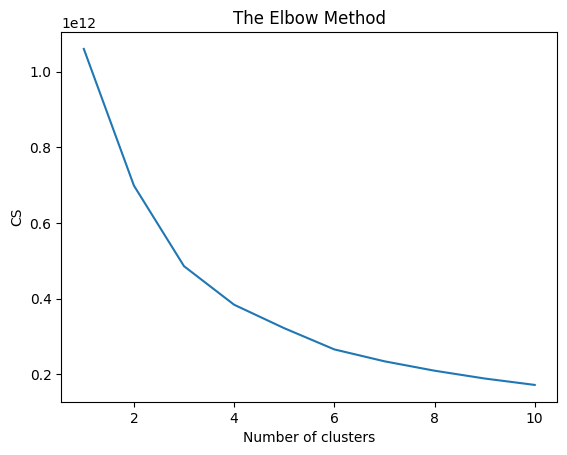

In [4]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

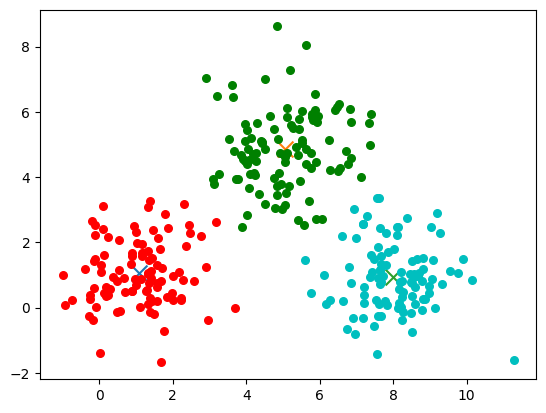

In [12]:
# class K_Means:
    
#     def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
#         self.k = k
#         self.max_iterations = max_iter
#         self.tolerance = tolerance
    
#     def euclidean_distance(self, point1, point2):
#         #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
#         return np.linalg.norm(point1-point2, axis=0)
        
#     def predict(self,data):
#         distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
#         classification = distances.index(min(distances))
#         return classification
    
#     def fit(self, data):
#         self.centroids = {}
#         for i in range(self.k):
#             self.centroids[i] = data[i]
        
        
#         for i in range(self.max_iterations):
#             self.classes = {}
#             for j in range(self.k):
#                 self.classes[j] = []
                
#             for point in data:
#                 distances = []
#                 for index in self.centroids:
#                     distances.append(self.euclidean_distance(point,self.centroids[index]))
#                 cluster_index = distances.index(min(distances))
#                 self.classes[cluster_index].append(point)
            
#             previous = dict(self.centroids)
#             for cluster_index in self.classes:
#                 self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
            

                
#             isOptimal = True
            
#             for centroid in self.centroids:
#                 original_centroid = previous[centroid]
#                 curr = self.centroids[centroid]
#                 if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
#                     isOptimal = False
#             if isOptimal:
#                 break


                
# def main():
#     K=3
#     center_1 = np.array([1,1])
#     center_2 = np.array([5,5])
#     center_3 = np.array([8,1])

#     # Generate random data and center it to the three centers
#     cluster_1 = np.random.randn(100, 2) + center_1
#     cluster_2 = np.random.randn(100,2) + center_2
#     cluster_3 = np.random.randn(100,2) + center_3

#     data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    
#     k_means = K_Means(K)
#     k_means.fit(data)

#     colors = 10*["r", "g", "c", "b", "k"]

#     for centroid in k_means.centroids:
#         plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

#     for cluster_index in k_means.classes:
#         color = colors[cluster_index]
#         for features in k_means.classes[cluster_index]:
#             plt.scatter(features[0], features[1], color = color,s = 30)

# if __name__ == "__main__":
#     main()
            

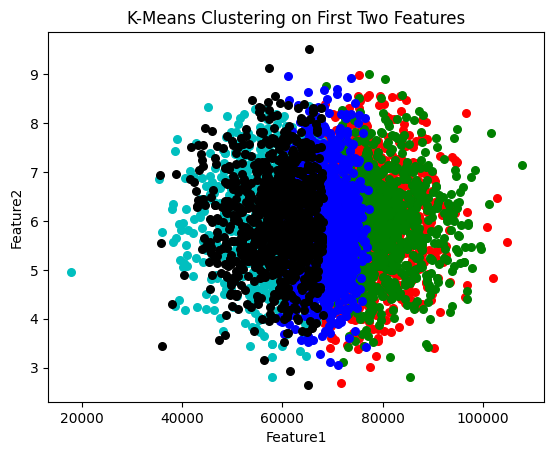

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class K_Means:
    
    def __init__(self, k=2, tolerance=0.001, max_iter=500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)
        
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        # Initialize centroids as the first k points in the dataset
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data.iloc[i].values  # Use values to convert to NumPy array
        
        for i in range(self.max_iterations):
            # Initialize empty classes dictionary
            self.classes = {j: [] for j in range(self.k)}
                
            for _, point in data.iterrows():
                distances = [self.euclidean_distance(point.values, self.centroids[index]) for index in self.centroids]
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point.values)
            
            previous = dict(self.centroids)
            
            # Update centroids as the mean of points in each cluster
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.mean(self.classes[cluster_index], axis=0)
            
            # Check for convergence
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

def main():
    
    k = 5
    k_means = K_Means(k=k)
    k_means.fit(X)

    colors = ["r", "g", "c", "b", "k"]

    # Plotting only two features for visualization (Feature1 and Feature2)
    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s=130, marker="x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index % len(colors)]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color=color, s=30)
    
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title("K-Means Clustering on First Two Features")
    plt.show()

if __name__ == "__main__":
    main()


In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [7]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

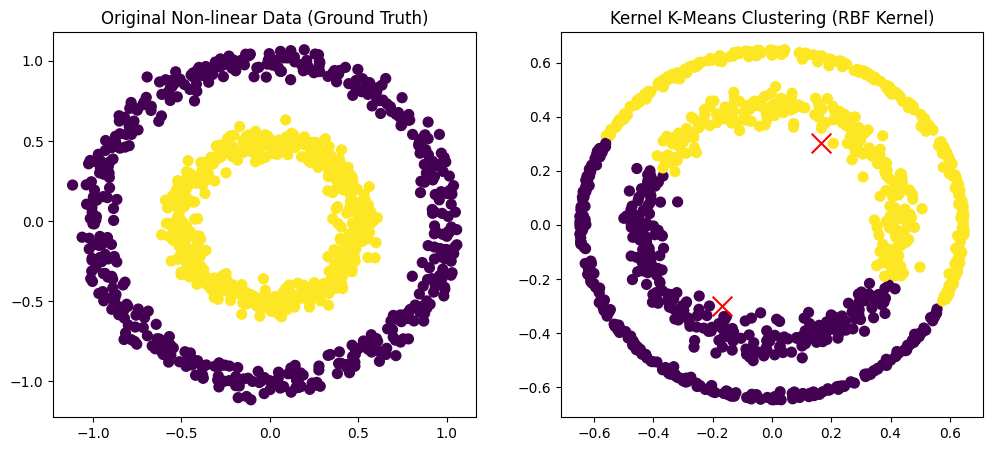

In [31]:
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
X_kpca = kpca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_kpca)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Original Non-linear Data (Ground Truth)")

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='x', color='red')
plt.title("Kernel K-Means Clustering (RBF Kernel)")

plt.show()



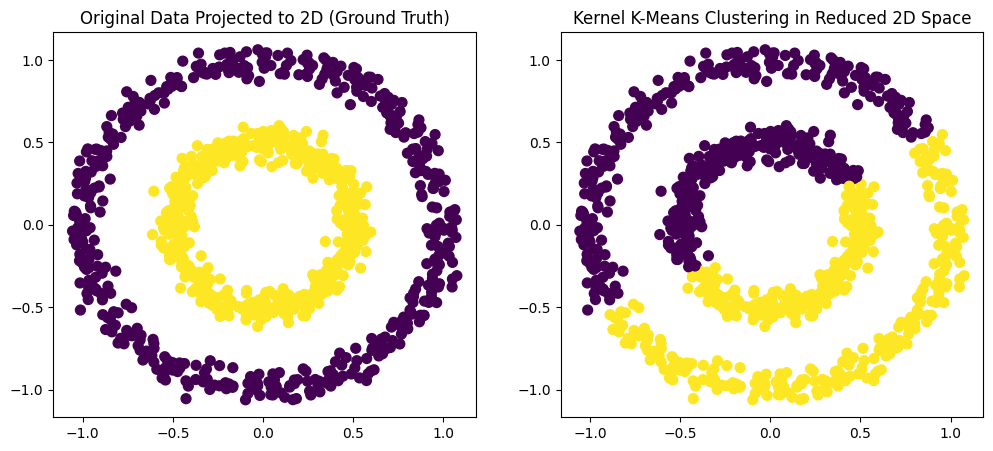

In [45]:
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate multidimensional data (e.g., 4D data)
# X, y_true = make_blobs(n_samples=400, centers=3, n_features=2, random_state=42)
X, y_true = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
# df=pd.read_csv('moonDataset.csv')
# X=df.drop(columns=['label'])
# y_true=df['label']

# Apply Kernel PCA to reduce data to 2D for visualization
kpca = KernelPCA(n_components=2, kernel='linear', gamma=1.0)
X_kpca = kpca.fit_transform(X)

# Fit KMeans on the original data (not reduced data)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot original data and clustered results in the reduced 2D space
plt.figure(figsize=(12, 5))

# Original ground truth in 2D (using Kernel PCA)
plt.subplot(1, 2, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Original Data Projected to 2D (Ground Truth)")

# Kernel K-Means clustering results in 2D
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("Kernel K-Means Clustering in Reduced 2D Space")

plt.show()


Model accuracy: 1.00


/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_26742/3836792023.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


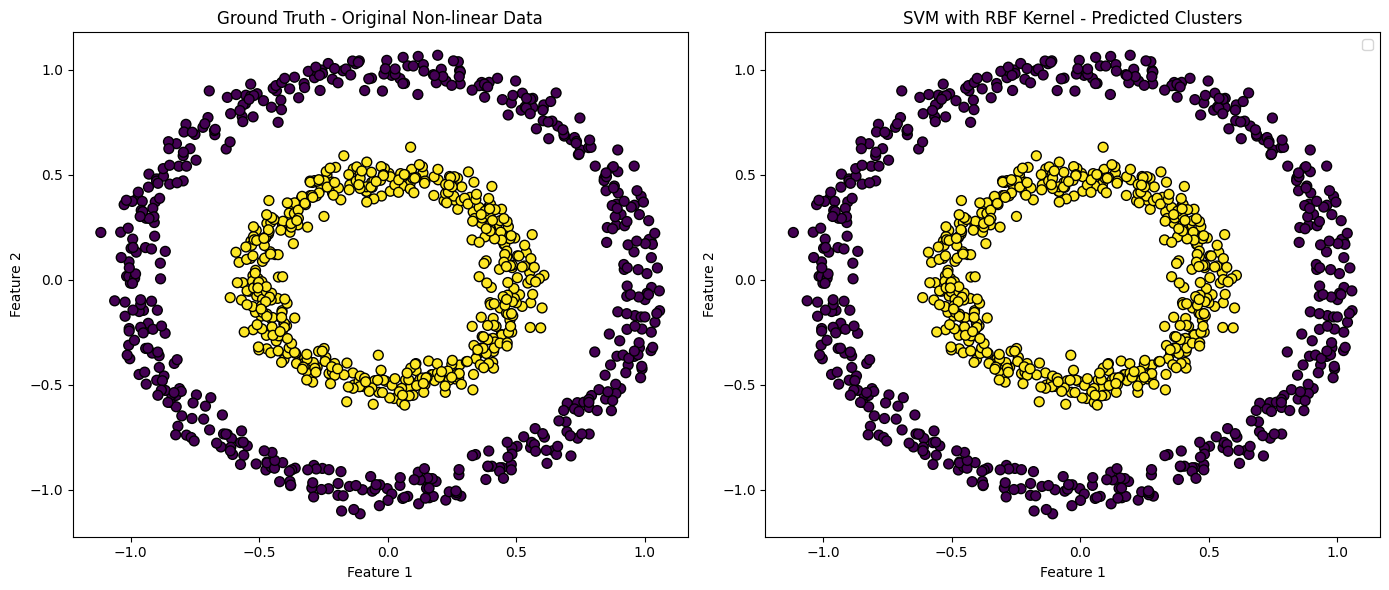

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Generate the concentric circles dataset
# X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
X, y_true = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Step 2: Train an SVM with an RBF kernel
svm_rbf = SVC(kernel='poly', gamma=1, C=1,degree=4)  # You can adjust gamma and C for better performance
svm_rbf.fit(X, y)

# Step 3: Predict labels for plotting and evaluate accuracy
y_pred = svm_rbf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Step 4: Set up the plotting area for comparison
plt.figure(figsize=(14, 6))

# Plotting the ground truth
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50, edgecolor="k")
plt.title("Ground Truth - Original Non-linear Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Generate a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the SVM decision boundary and classification result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=50, edgecolor="k")
plt.title("SVM with RBF Kernel - Predicted Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()
